In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read initial data and analyse the text file

In [274]:
data =pd.read_csv('./WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt',header = None,sep=",")
data.columns = ['id', 'class', 'timestamp', 'x', 'y', 'z']

In [275]:
data.head()

,id,class,timestamp,x,y,z
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


### Treat anamolies in text file

In [276]:
data.columns
type(data)
data.shape

(1098209, 6)

In [277]:
data.head()

,id,class,timestamp,x,y,z
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


In [278]:
for i in data.columns:
    print(i,data[i][pd.to_numeric(data[i],errors='coerce').isnull()].nunique())

id 0
class 6
timestamp 0
x 0
y 0
z 0


In [279]:
# what to do with missing data
# Yo, is there any missing data??

In [280]:
data[pd.to_numeric(data['z'],errors='coerce').isnull()]

,id,class,timestamp,x,y,z
343419,11,Walking,1867172313000,4.4,4.4,NaN


In [281]:
idx = data[pd.to_numeric(data['z'],errors='coerce').isnull()].index
idx

Int64Index([343419], dtype='int64')

In [282]:
# Should we be dropping?
for x in idx:
    print(x)
    data.drop(x,axis=0,inplace=True)

343419


In [283]:
data.columns

Index(['id', 'class', 'timestamp', 'x', 'y', 'z'], dtype='object')

In [284]:
data[['timestamp','id']]=data[['timestamp','id']].astype(int)
data[[ 'x', 'y', 'z']]=data[[ 'x', 'y', 'z']].astype(float)
data[['class']]=data[['class']].astype(str)

In [285]:
data.dtypes

id             int64
class         object
timestamp      int64
x            float64
y            float64
z            float64
dtype: object

In [286]:
data.sort_values(['id','timestamp'],inplace=True)

In [287]:
data.reset_index(drop=True,inplace=True)

In [288]:
data.groupby('class').size()/data.shape[0]*100

class
Downstairs     9.144625
Jogging       31.157941
Sitting        5.457891
Standing       4.406724
Upstairs      11.188136
Walking       38.644683
dtype: float64

In [289]:
data[(data['id']==2)&(data['class']=='Walking')]['timestamp'].max()

10012532331000

In [290]:
data[(data['id']==2)&(data['timestamp']>=10012532331000)]

,id,class,timestamp,x,y,z
47245,2,Walking,10012532331000,-2.96,7.31,-4.40
47246,2,Jogging,10065442335000,-4.71,2.18,3.68
47247,2,Jogging,10065492322000,-9.89,6.89,2.68
47248,2,Jogging,10065542341000,-9.66,11.54,2.11
47249,2,Jogging,10065592328000,-8.08,9.28,4.52
...,...,...,...,...,...,...
53498,2,Jogging,10378042341000,-12.18,3.30,0.34
53499,2,Jogging,10378092298000,-11.03,3.26,-5.86
53500,2,Jogging,10378142347000,-10.34,7.50,-6.09
53501,2,Jogging,10378192335000,-8.35,5.48,-2.41


In [291]:
data.iloc[17855:17865]

,id,class,timestamp,x,y,z
17855,1,Walking,5974702314000,-2.87,6.55,-0.04
17856,1,Walking,5974702314000,-2.87,6.55,-0.04
17857,1,Walking,5974772290000,0.61,19.46,12.22
17858,1,Walking,5974822278000,-1.31,12.07,-0.46
17859,1,Walking,5974872327000,-1.18,12.95,1.18
17860,1,Jogging,5995682355000,10.04,5.67,1.76
17861,1,Jogging,5995732343000,5.28,8.35,1.31
17862,1,Jogging,5995782331000,6.59,9.28,5.52
17863,1,Jogging,5995832349000,3.72,7.35,5.28
17864,1,Jogging,5995882337000,10.53,10.99,3.30


##### Sampling rate: 
20Hz (1 sample every 50ms)

* 10 sec - 200 records
* 12 sec - 240 records 
* 20 sec - 400 records

In [292]:
# 1000/50 

In [293]:
data.describe()

,id,timestamp,x,y,z
count,1.098208e+06,1.098208e+06,1.098208e+06,1.098208e+06,1.098208e+06
mean,1.886067e+01,3.340895e+13,6.628660e-01,7.255626e+00,4.110784e-01
std,1.021423e+01,4.944962e+13,6.849046e+00,6.746216e+00,4.754120e+00
min,1.000000e+00,0.000000e+00,-1.961000e+01,-1.961000e+01,-1.980000e+01
25%,1.000000e+01,2.019110e+12,-2.870000e+00,3.170000e+00,-2.220000e+00
50%,1.900000e+01,9.722677e+12,2.700000e-01,7.930000e+00,0.000000e+00
75%,2.800000e+01,4.996560e+13,4.440000e+00,1.156000e+01,2.720000e+00
max,3.600000e+01,2.093974e+14,1.995000e+01,2.004000e+01,1.961000e+01


In [294]:
data.groupby('id')['timestamp'].shift(periods=1).diff()

0                 NaN
1                 NaN
2          49988000.0
3          50018000.0
4          49988000.0
              ...    
1098203    49987000.0
1098204    49988000.0
1098205    50018000.0
1098206    50019000.0
1098207    49988000.0
Name: timestamp, Length: 1098208, dtype: float64

In [295]:
from datetime import datetime

timestamp = 4991922345
datetime.fromtimestamp(timestamp)

datetime.datetime(2128, 3, 9, 16, 5, 45)

In [296]:
datetime.timestamp(datetime.now())

1638516131.314618

In [297]:
data.timestamp[0]

4991922345000

In [298]:
(data[:200].timestamp.max()-data[:200].timestamp.min())

9950013000

In [299]:
data

,id,class,timestamp,x,y,z
0,1,Walking,4991922345000,0.69,10.80,-2.030000
1,1,Walking,4991972333000,6.85,7.44,-0.500000
2,1,Walking,4992022351000,0.93,5.63,-0.500000
3,1,Walking,4992072339000,-2.11,5.01,-0.690000
4,1,Walking,4992122358000,-4.59,4.29,-1.950000
...,...,...,...,...,...,...
1098203,36,Standing,15049012250000,-0.91,9.43,2.533385
1098204,36,Standing,15049062268000,-1.18,9.51,2.492524
1098205,36,Standing,15049112287000,-1.50,9.53,2.533385
1098206,36,Standing,15049162275000,-2.07,8.77,2.179256


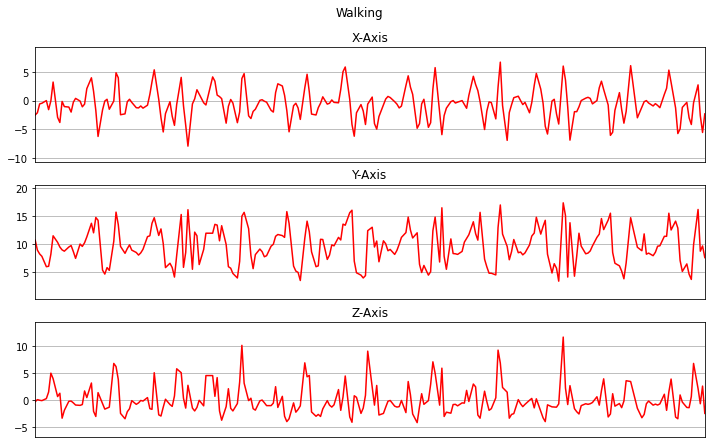

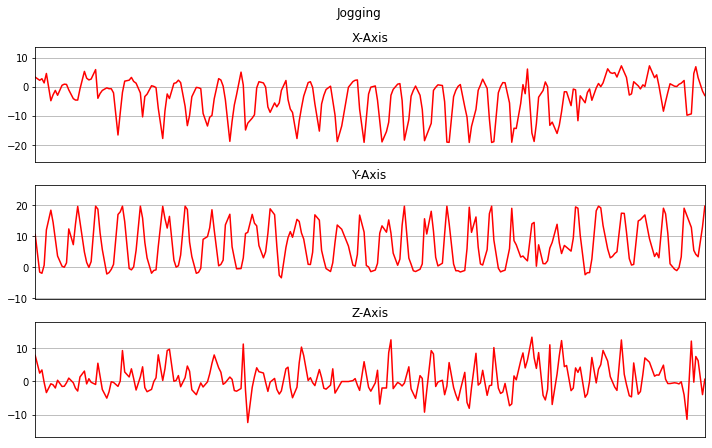

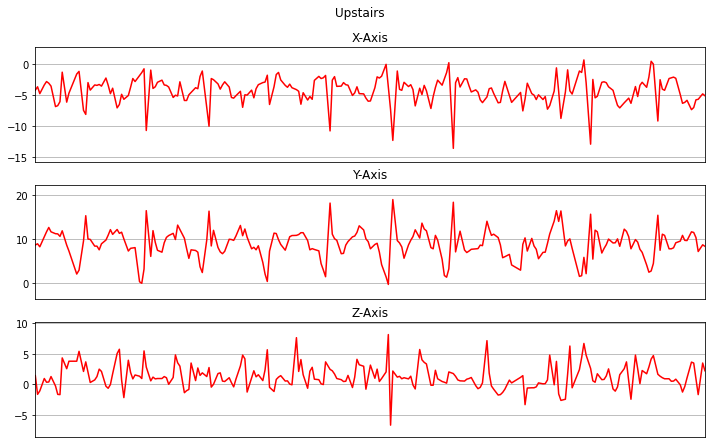

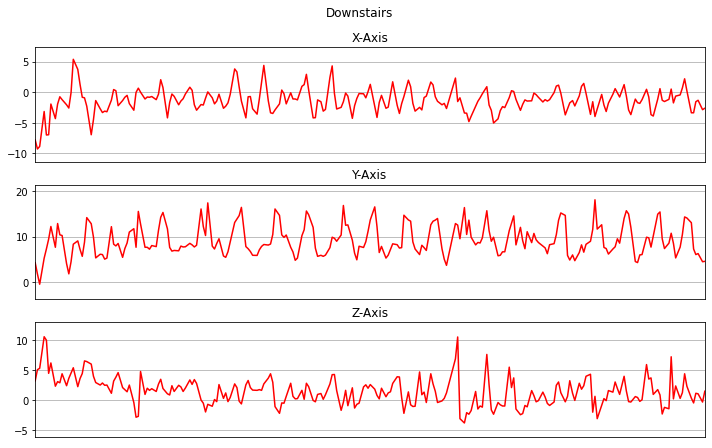

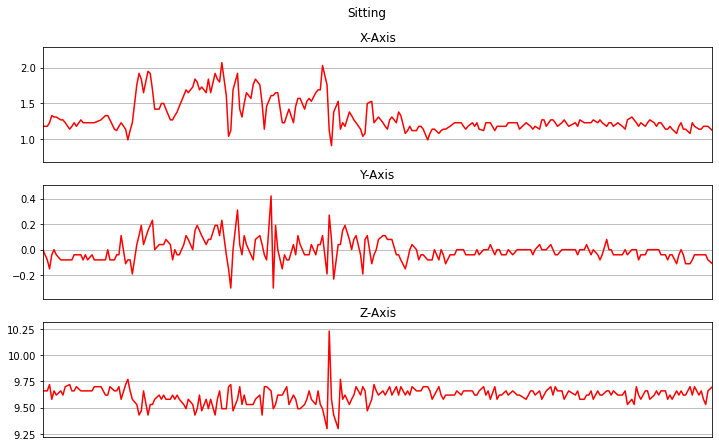

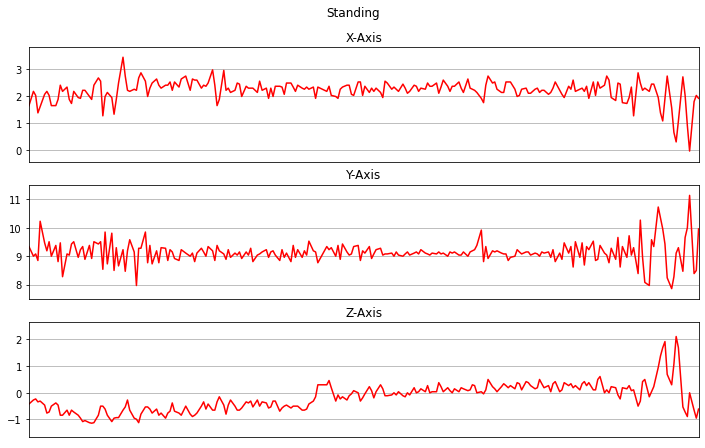

In [300]:
seconds = 20
def plot_activity(activity, data):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(12, 7))
    plot_axis(ax0, data['timestamp'], data['x'], 'X-Axis')
    plot_axis(ax1, data['timestamp'], data['y'], 'Y-Axis')
    plot_axis(ax2, data['timestamp'], data['z'], 'Z-Axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()
def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'r')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)
for c in data['class'].unique():
    plot_activity(c, data[(data['id']==31)&(data['class'] == c)][:seconds*12])

In [301]:
data.groupby('class')['x'].describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
Downstairs,100427.0,0.471718,4.955948,-19.61,-2.18,0.08,2.83,19.95
Jogging,342179.0,-0.201963,9.109470,-19.61,-5.43,0.00,5.18,19.95
Sitting,59939.0,1.856270,4.759028,-10.31,-1.61,1.53,5.75,12.45
Standing,48395.0,-1.178258,3.235125,-10.99,-2.03,-1.12,0.61,13.10
Upstairs,122869.0,0.381334,5.495272,-19.61,-2.26,0.15,3.06,19.95
Walking,424399.0,1.528288,5.793331,-19.61,-2.15,0.95,4.82,19.91


In [302]:
data.groupby('class')['y'].describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
Downstairs,100427.0,8.600230,4.904716,-19.61,5.94,8.58,11.45,20.04
Jogging,342179.0,5.461080,9.224947,-19.61,-0.72,4.56,13.38,20.04
Sitting,59939.0,1.853374,3.257750,-9.30,-0.95,2.49,3.72,18.47
Standing,48395.0,8.987236,1.264772,-0.65,8.50,9.43,9.81,19.46
Upstairs,122869.0,8.111545,4.890709,-19.61,5.43,8.54,11.03,20.04
Walking,424399.0,8.702048,5.006519,-18.85,5.28,8.77,12.15,20.04


In [303]:
data.groupby('class')['z'].describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
Downstairs,100427.0,0.684080,3.706798,-19.61,-1.438689,0.503953,2.750000,19.34
Jogging,342179.0,-0.124295,5.833195,-19.80,-3.490000,-0.299648,3.296124,19.61
Sitting,59939.0,6.559716,3.735591,-10.80,5.710000,8.117727,8.920000,13.99
Standing,48395.0,0.580193,1.376870,-4.14,-0.500000,0.650000,1.420000,7.25
Upstairs,122869.0,0.323542,3.567884,-19.61,-1.688923,0.081722,2.070293,19.19
Walking,424399.0,-0.084199,4.011106,-19.38,-2.370000,-0.503953,1.690000,19.23


In [304]:
data

,id,class,timestamp,x,y,z
0,1,Walking,4991922345000,0.69,10.80,-2.030000
1,1,Walking,4991972333000,6.85,7.44,-0.500000
2,1,Walking,4992022351000,0.93,5.63,-0.500000
3,1,Walking,4992072339000,-2.11,5.01,-0.690000
4,1,Walking,4992122358000,-4.59,4.29,-1.950000
...,...,...,...,...,...,...
1098203,36,Standing,15049012250000,-0.91,9.43,2.533385
1098204,36,Standing,15049062268000,-1.18,9.51,2.492524
1098205,36,Standing,15049112287000,-1.50,9.53,2.533385
1098206,36,Standing,15049162275000,-2.07,8.77,2.179256


In [305]:
data.groupby('id')['class'].max()

id
1     Walking
2     Walking
3     Walking
4     Walking
5     Walking
6     Walking
7     Walking
8     Walking
9     Walking
10    Walking
11    Walking
12    Walking
13    Walking
14    Walking
15    Walking
16    Walking
17    Walking
18    Walking
19    Walking
20    Walking
21    Walking
22    Walking
23    Walking
24    Walking
25    Walking
26    Walking
27    Walking
28    Walking
29    Walking
30    Walking
31    Walking
32    Walking
33    Walking
34    Walking
35    Walking
36    Walking
Name: class, dtype: object

In [306]:
data.head()

,id,class,timestamp,x,y,z
0,1,Walking,4991922345000,0.69,10.80,-2.03
1,1,Walking,4991972333000,6.85,7.44,-0.50
2,1,Walking,4992022351000,0.93,5.63,-0.50
3,1,Walking,4992072339000,-2.11,5.01,-0.69
4,1,Walking,4992122358000,-4.59,4.29,-1.95


In [307]:
from sklearn import tree
from sklearn.linear_model import LogisticRegression

In [308]:
from sklearn.model_selection import train_test_split

# Explore Classification Performance on Raw Data
We don't expect this to work very well as standard classification algorithms
give no value to temporal relation between data points.

In [309]:
train, test, y_train, y_test = train_test_split(data[['x', 'y', 'z']], data['class'],)
viz = train[0:3]
print(viz)
print(y_train[0:3])
print(data[['x', 'y', 'z', 'class']][0:3])

            x      y      z
685335  -0.99  19.50  15.64
753811 -19.46  11.22 -13.33
737989   5.37   2.83   2.60
685335    Walking
753811    Jogging
737989    Walking
Name: class, dtype: object
      x      y     z    class
0  0.69  10.80 -2.03  Walking
1  6.85   7.44 -0.50  Walking
2  0.93   5.63 -0.50  Walking


In [310]:
train.shape, test.shape, y_train.shape, y_test.shape

((823656, 3), (274552, 3), (823656,), (274552,))

In [311]:
data.columns

Index(['id', 'class', 'timestamp', 'x', 'y', 'z'], dtype='object')

In [312]:
dt = tree.DecisionTreeClassifier()
dt.fit(train, y_train)

DecisionTreeClassifier()

In [313]:
from sklearn.metrics import accuracy_score, f1_score

In [314]:
accuracy_score(dt.predict(test),y_test)

0.5440608700719718

In [315]:
clf = LogisticRegression(solver='saga')
clf.fit(train, y_train)
print(f'Logistic regression training accuracy: {accuracy_score(clf.predict(train), y_train)}.')
print(f'Logistic regression test accuracy: {accuracy_score(clf.predict(test), y_test)}.')

Logistic regression training accuracy: 0.47632749594490903.
Logistic regression test accuracy: 0.47512675194498677.


In [316]:
data[['id', 'class', 'timestamp', 'x', 'y', 'z']].to_csv('./preProcessed_data.csv',index=False)

## Examine Axis Normalization via PCA
Orientations may not be entirely guaranteed.

In [317]:
from sklearn.decomposition import PCA

# Should be 3D...
def generatePCA2D(X,person='all'):
    pca = PCA(n_components=3)
    pca.fit(X)

    m = X.mean()
    t_mean = [m['x'], m['y']]
    components = pca.components_
    values = pca.singular_values_ / 10
    plt.title('Person ID: ' + person)
    plt.axis('equal')
    plt.arrow(t_mean[0], t_mean[1], components[0, 0]*values[0], components[1, 0]*values[0], ec='red', head_width=0.1)
    plt.arrow(t_mean[0], t_mean[1], components[0, 1]*values[1], components[1, 1]*values[1], ec='green', head_width=0.1)
    #plt.scatter(X['x'], X['y'], s=10)
    plt.show()


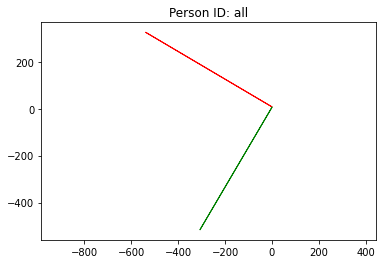

In [318]:
generatePCA2D(train)

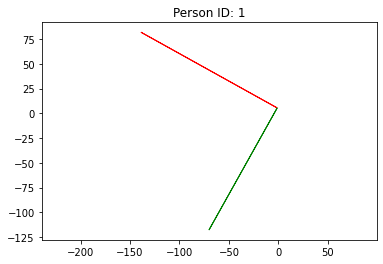

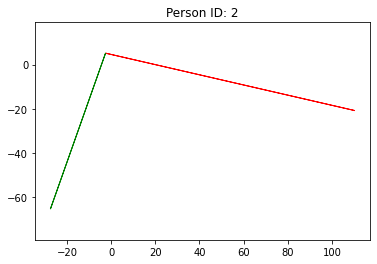

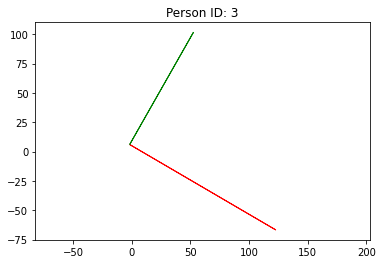

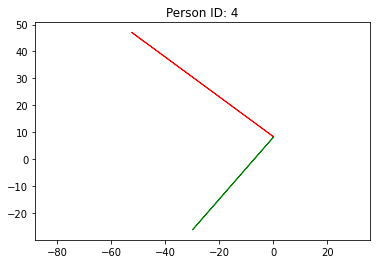

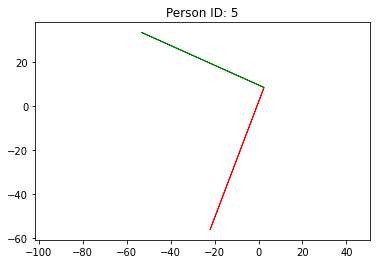

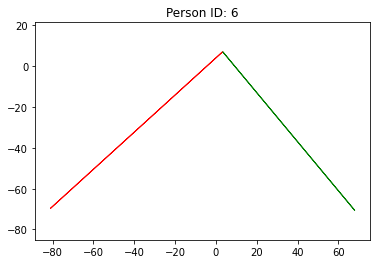

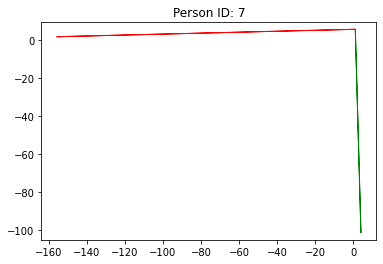

In [319]:
for p in range(1, 8):
    data2 = data[data['id'] == p][['x', 'y', 'z']]
    generatePCA2D(data2, str(p))

In [320]:
projData = pd.read_csv('./preProcessed_data.csv')
unflat = []
unflat_y = []
for p in projData.groupby('id'):
    id = p[0]
    pData = p[1][['x', 'y', 'z']]
    ys = list(p[1]['class'])
    pca = PCA(n_components=3)
    pca.fit(pData)
    new = pca.transform(pData)
    projData.loc[projData['id'] == id,['x', 'y', 'z']] = new
    unflat.append(new)
    unflat_y.append(ys)
print(projData)
print(unflat[0])

         id     class       timestamp         x         y         z
0         1   Walking   4991922345000 -4.343887 -3.881268 -1.917725
1         1   Walking   4991972333000 -8.051162  2.184328 -0.897549
2         1   Walking   4992022351000 -1.999563  0.880989 -0.941788
3         1   Walking   4992072339000  0.952238 -0.076510 -1.121125
4         1   Walking   4992122358000  3.431693 -0.785513 -2.388413
...      ..       ...             ...       ...       ...       ...
1098203  36  Standing  15049012250000 -1.237539 -0.125010  1.254719
1098204  36  Standing  15049062268000 -1.328165 -0.021741  1.005537
1098205  36  Standing  15049112287000 -1.363376  0.180052  0.755518
1098206  36  Standing  15049162275000 -0.619533  0.214199  0.067448
1098207  36  Standing  15049212262000 -1.771388  1.112551  0.599694

[1098208 rows x 6 columns]
[[-4.34388748 -3.88126753 -1.91772541]
 [-8.05116221  2.18432844 -0.89754918]
 [-1.99956325  0.88098927 -0.94178789]
 ...
 [-8.63276244  4.73598951 -1.82865

In [321]:
rows = []
y_vals = []
for mat, ys in zip(unflat, unflat_y):
    for row, y in zip(mat, ys):
        rows.append(row)
        y_vals.append(y)


projected_X = np.array(rows)
projected_Y = np.array(y_vals)

In [322]:
proj_train, proj_test, proj_y_train, proj_y_test = train_test_split(projected_X, projected_Y,)
clf = LogisticRegression(solver='liblinear')
clf.fit(proj_train, proj_y_train)
print(f'Logistic regression training accuracy: {accuracy_score(clf.predict(proj_train), proj_y_train)}.')
print(f'Logistic regression test accuracy: {accuracy_score(clf.predict(proj_test), proj_y_test)}.')

Logistic regression training accuracy: 0.4455755800965452.
Logistic regression test accuracy: 0.44491753838981324.


In [323]:
dt = tree.DecisionTreeClassifier()
dt.fit(proj_train, proj_y_train)
accuracy_score(dt.predict(proj_test),proj_y_test)

0.5187869693172878

In [324]:
projDataTotal = pd.read_csv('./preProcessed_data.csv')
x_num, y_num = projDataTotal[['x', 'y', 'z']], projDataTotal['class']
pca = PCA(n_components=3)
pca.fit(x_num)
x_num_proj = pca.transform(x_num)

projDataTotal.loc[:, ['x', 'y,', 'z']] = x_num_proj

proj_train, proj_test, proj_y_train, proj_y_test = train_test_split(x_num_proj, y_num,)
clf = LogisticRegression(solver='liblinear')
clf.fit(proj_train, proj_y_train)
print(f'Logistic regression training accuracy: {accuracy_score(clf.predict(proj_train), proj_y_train)}.')
print(f'Logistic regression test accuracy: {accuracy_score(clf.predict(proj_test), proj_y_test)}.')

dt = tree.DecisionTreeClassifier()
dt.fit(proj_train, proj_y_train)
accuracy_score(dt.predict(proj_test),proj_y_test)

Logistic regression training accuracy: 0.47080213098672263.
Logistic regression test accuracy: 0.4705884495468982.


0.5439734549374982

In [325]:
x_num_proj = np.random.rand(y_num.shape[0], 3)
proj_train, proj_test, proj_y_train, proj_y_test = train_test_split(x_num_proj, y_num,)
clf = LogisticRegression(solver='liblinear')
clf.fit(proj_train, proj_y_train)
print(f'Logistic regression training accuracy: {accuracy_score(clf.predict(proj_train), proj_y_train)}.')
print(f'Logistic regression test accuracy: {accuracy_score(clf.predict(proj_test), proj_y_test)}.')

Logistic regression training accuracy: 0.38697344522470545.
Logistic regression test accuracy: 0.38486698330370933.


# Features

In [354]:
data = pd.read_csv('./preProcessed_data.csv')
# Consider ProjData?
# data = projDataTotal

In [355]:
data.columns

Index(['id', 'class', 'timestamp', 'x', 'y', 'z'], dtype='object')

win_type='gaussian'

In [356]:
# Window width
w = 200

# Sliding window 'stride'
stride = 4 * 20

In [357]:
rolling_data_x = data.groupby('id')['x'].rolling(window=w,min_periods=5)
rolling_data_y = data.groupby('id')['y'].rolling(window=w,min_periods=5)
rolling_data_z = data.groupby('id')['z'].rolling(window=w,min_periods=5)

In [358]:
data['rolling_x_mean']=list(rolling_data_x.mean().fillna(0))
data['rolling_y_mean']=list(rolling_data_y.mean().fillna(0))
data['rolling_z_mean']=list(rolling_data_z.mean().fillna(0))

In [359]:
data['rolling_x_std']=list(rolling_data_x.std().fillna(0))
data['rolling_y_std']=list(rolling_data_y.std().fillna(0))
data['rolling_z_std']=list(rolling_data_z.std().fillna(0))

In [360]:
data['rolling_x_min']=list(rolling_data_x.min().fillna(0))
data['rolling_y_min']=list(rolling_data_y.min().fillna(0))
data['rolling_z_min']=list(rolling_data_z.min().fillna(0))

In [361]:
data['rolling_x_max']=list(rolling_data_x.max().fillna(0))
data['rolling_y_max']=list(rolling_data_y.max().fillna(0))
data['rolling_z_max']=list(rolling_data_z.max().fillna(0))

In [362]:
# data['rolling_x_iqr']=np.array(data.groupby('personId')['x'].rolling(window=240,max_periods=5).quantile(0.75).fillna(0))-np.array(data.groupby('personId')['x'].rolling(window=w,max_periods=5).quantile(0.25).fillna(0))
# data['rolling_y_iqr']=np.array(data.groupby('personId')['y'].rolling(window=240,max_periods=5).quantile(0.75).fillna(0))-np.array(data.groupby('personId')['y'].rolling(window=w,max_periods=5).quantile(0.25).fillna(0))
# data['rolling_z_iqr']=np.array(data.groupby('personId')['z'].rolling(window=240,max_periods=5).quantile(0.75).fillna(0))-np.array(data.groupby('personId')['z'].rolling(window=w,max_periods=5).quantile(0.25).fillna(0))

data['rolling_x_iqr']=np.array(rolling_data_x.quantile(0.75).fillna(0))-np.array(rolling_data_x.quantile(0.25).fillna(0))
data['rolling_y_iqr']=np.array(rolling_data_y.quantile(0.75).fillna(0))-np.array(rolling_data_y.quantile(0.25).fillna(0))
data['rolling_z_iqr']=np.array(rolling_data_z.quantile(0.75).fillna(0))-np.array(rolling_data_z.quantile(0.25).fillna(0))

In [363]:
data['avg_speed'] = np.sqrt(np.square(data['x'])+np.square(data['y'])+np.square(data['z']))
data['rolling_mean_speed']=list(data.groupby('id')['avg_speed'].rolling(window=w,min_periods=5).mean().fillna(0))

In [364]:
data['abs_x_diff']=np.abs(data.groupby('id')['x'].diff().fillna(0))
data['abs_y_diff']=np.abs(data.groupby('id')['y'].diff().fillna(0))
data['abs_z_diff']=np.abs(data.groupby('id')['z'].diff().fillna(0))

In [365]:
data['rolling_abs_x_diff']=list(data.groupby('id')['abs_x_diff'].rolling(window=w,min_periods=5).mean().fillna(0))
data['rolling_abs_y_diff']=list(data.groupby('id')['abs_y_diff'].rolling(window=w,min_periods=5).mean().fillna(0))
data['rolling_abs_z_diff']=list(data.groupby('id')['abs_z_diff'].rolling(window=w,min_periods=5).mean().fillna(0))

## Subset Data - consider every 4th second 

In [366]:
# mode for 20 seconds in 4th second
for key, dat in data.groupby('id'):
    dat.reset_index(drop=True,inplace=True)


In [367]:
final = pd.DataFrame()
for key, dat in data.groupby('id'):
    dat.reset_index(drop=True,inplace=True)
    final=final.append(dat.iloc[list(range(w,len(dat)-w,stride))])

final

,id,class,timestamp,x,y,z,rolling_x_mean,rolling_y_mean,rolling_z_mean,rolling_x_std,...,rolling_y_iqr,rolling_z_iqr,avg_speed,rolling_mean_speed,abs_x_diff,abs_y_diff,abs_z_diff,rolling_abs_x_diff,rolling_abs_y_diff,rolling_abs_z_diff
200,1,Walking,5001922345000,6.17,6.13,-1.650000,3.80205,9.91740,-0.574000,5.743151,...,5.4775,2.635000,8.852587,12.200161,0.31,2.07,0.490000,4.59770,3.25065,2.850500
280,1,Walking,5005932325000,1.61,8.43,-1.950000,3.82400,10.00365,-0.624150,5.883860,...,6.0400,3.017500,8.801108,12.415330,1.08,0.88,2.110000,4.79150,3.56460,2.959100
360,1,Walking,5009922376000,-0.23,11.11,-1.760000,3.78300,9.97410,-0.552250,5.814160,...,5.7975,3.300000,11.250893,12.356238,3.34,3.03,1.200000,4.77505,3.84140,3.060900
440,1,Walking,5013942304000,0.34,11.14,-1.420000,3.57800,10.00005,-0.608500,5.746907,...,5.3875,3.807500,11.235284,12.292270,4.40,2.86,1.110000,4.71180,4.05550,3.189600
520,1,Walking,5017942304000,-2.72,11.73,-1.420000,3.37050,10.15345,-0.683350,5.756880,...,5.5000,3.572500,12.124673,12.378581,3.10,3.72,5.050000,4.66750,4.18825,3.217650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31720,36,Standing,15022192304000,-1.33,9.47,2.260978,-1.34585,9.51750,2.103799,0.255745,...,0.1100,0.282622,9.826587,9.845150,0.06,0.04,0.081722,0.10945,0.07260,0.084787
31800,36,Standing,15026192304000,-1.04,9.62,2.410802,-1.37070,9.51750,2.095150,0.235644,...,0.1100,0.320078,9.971859,9.845993,0.05,0.28,0.040861,0.11675,0.08775,0.073005
31880,36,Standing,15030182599000,-1.08,9.43,2.410802,-1.32085,9.49720,2.262816,0.225049,...,0.1000,0.258787,9.793021,9.856263,0.04,0.08,0.040861,0.13745,0.09870,0.092618
31960,36,Standing,15034192273000,-1.33,9.38,2.492524,-1.29645,9.45815,2.413730,0.189341,...,0.1300,0.231546,9.796222,9.850467,0.02,0.09,0.040861,0.11690,0.07965,0.084787


In [368]:
dat['class'].mode()

0    Jogging
dtype: object

In [369]:
final['class'].value_counts()

Walking       5258
Jogging       4244
Upstairs      1510
Downstairs    1241
Sitting        740
Standing       572
Name: class, dtype: int64

In [370]:
final.columns

Index(['id', 'class', 'timestamp', 'x', 'y', 'z', 'rolling_x_mean',
       'rolling_y_mean', 'rolling_z_mean', 'rolling_x_std', 'rolling_y_std',
       'rolling_z_std', 'rolling_x_min', 'rolling_y_min', 'rolling_z_min',
       'rolling_x_max', 'rolling_y_max', 'rolling_z_max', 'rolling_x_iqr',
       'rolling_y_iqr', 'rolling_z_iqr', 'avg_speed', 'rolling_mean_speed',
       'abs_x_diff', 'abs_y_diff', 'abs_z_diff', 'rolling_abs_x_diff',
       'rolling_abs_y_diff', 'rolling_abs_z_diff'],
      dtype='object')

In [371]:
features =  ['x', 'y', 'z', 'rolling_x_mean',
       'rolling_y_mean', 'rolling_z_mean', 'rolling_x_std', 'rolling_y_std',
       'rolling_z_std', 'rolling_x_min', 'rolling_y_min', 'rolling_z_min',
       'rolling_x_max', 'rolling_y_max', 'rolling_z_max', 'rolling_x_iqr',
       'rolling_y_iqr', 'rolling_z_iqr',  'rolling_mean_speed',
#        'abs_x_diff', 'abs_y_diff', 'abs_z_diff', 
#              'rolling_abs_x_diff'
            ]

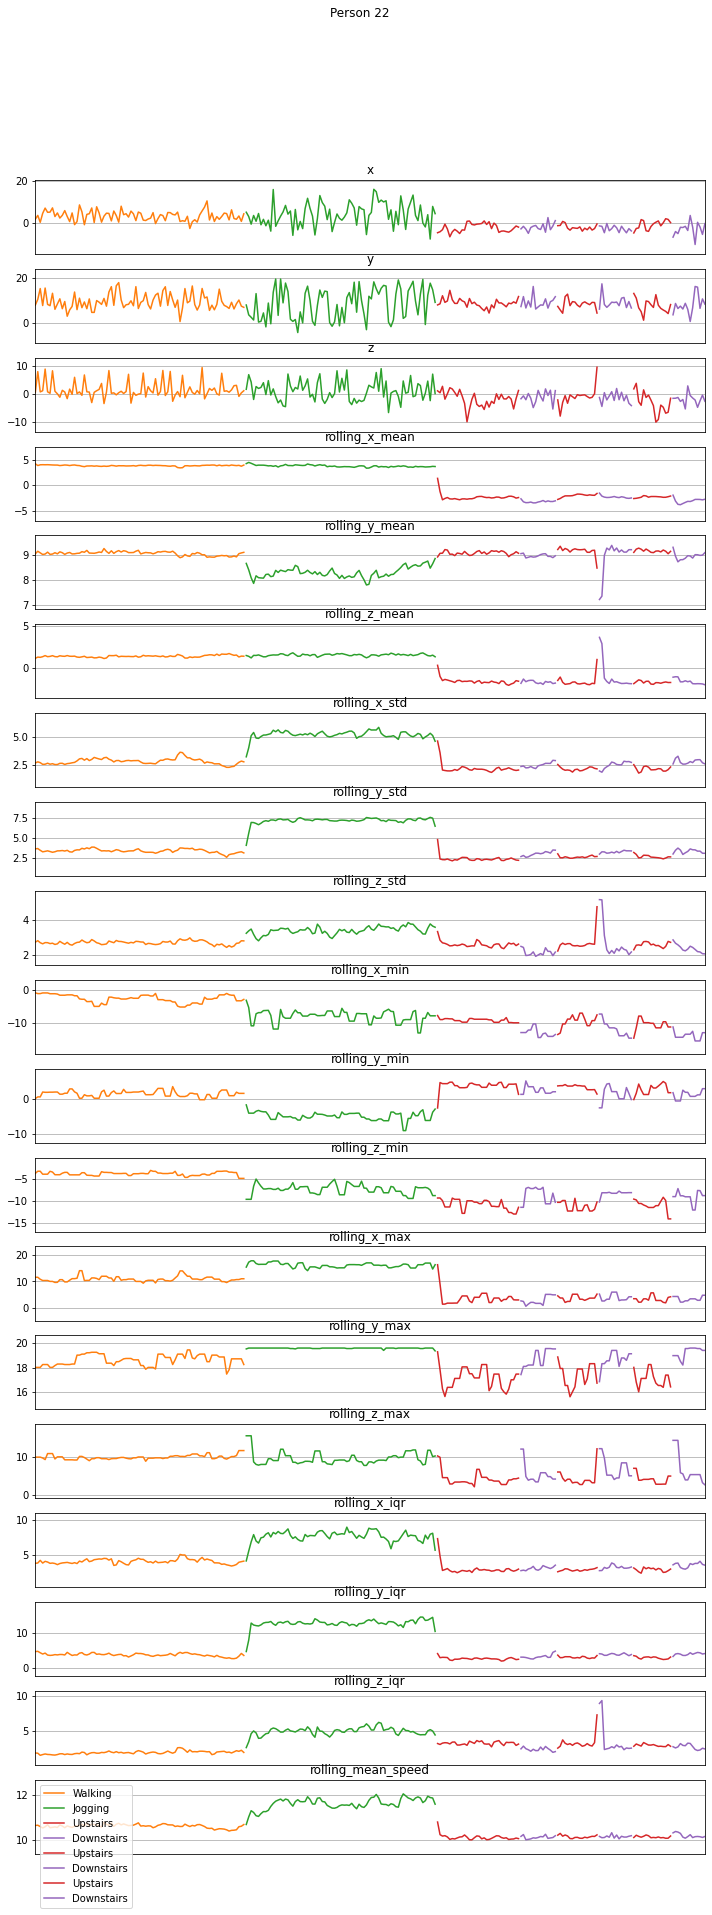

In [419]:
timeSteps = 100
def plot_activity2(activity, data):
    fig, axTup = plt.subplots(nrows=len(features), figsize=(12, 30))
    for ax, feat in zip(axTup, features):
        # Note that I'm using range() vs timestamp
        plot_axis2(ax, range(len(data)), data[feat], data['class'], feat)
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.legend()
    plt.show()

def classColor(c):
    if c == 'Walking':
        return "C1"
    elif c == 'Jogging':
        return "C2"
    elif c == 'Upstairs':
        return "C3"
    elif c == 'Downstairs':
        return "C4"
    elif c == 'Sitting':
        return "C5"
    elif c == 'Standing':
        return "C6"
    
    raise Exception('Hi: ' + c)

def splitByActivity(X, Y, C):
    lastC = None
    cumXY = []
    cumClass = []
    currXY = []
    currClass = []
    for x, y, c in zip(X, Y, C):
        if lastC is not None and lastC != c:
            cumXY.append(currXY)
            currXY = []
            cumClass.append(currClass)
            currClass = []
        currXY.append([x, y])
        currClass.append(c)
        lastC = c
    if len(currXY) > 0:
        cumXY.append(currXY)
        cumClass.append(currClass)
    return cumXY, cumClass
        

def plot_axis2(ax, x, y, c, title):
    gxy, gc = splitByActivity(x, y, c)
    #print(gxy)
    for xy, cc in zip(gxy, gc):
        #print(cc)
        ax.plot(list(map(lambda v: v[0], xy)), list(map(lambda v: v[1], xy)), classColor(cc[0]), label=cc[0])
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)
#for c in data['class'].unique():
person = 22
plot_activity2('Person ' + str(person), final[(final['id'] == person)])

In [373]:
train, test, y_train, y_test = train_test_split(final[features], final['class'], stratify=final['class'])

In [374]:
train.shape,test.shape

((10173, 19), (3392, 19))

In [375]:
y_train.value_counts()

Walking       3943
Jogging       3183
Upstairs      1132
Downstairs     931
Sitting        555
Standing       429
Name: class, dtype: int64

In [376]:
dt = tree.DecisionTreeClassifier()
dt.fit(train, y_train)

DecisionTreeClassifier()

In [377]:
accuracy_score(dt.predict(train), y_train)

0.9992136046397326

In [378]:
f1_score(dt.predict(train), y_train, average='macro')

0.9992584342420786

In [379]:
accuracy_score(dt.predict(test), y_test)

0.8941627358490566

In [380]:
f1_score(dt.predict(test),y_test,average='macro')

0.8598259826409237

In [381]:
clf = LogisticRegression(solver='saga')
clf.fit(train, y_train)
print(f'Logistic regression training accuracy: {accuracy_score(clf.predict(train), y_train)}.')
print(f'Logistic regression test accuracy: {accuracy_score(clf.predict(test), y_test)}.')

Logistic regression training accuracy: 0.8510763786493659.
Logistic regression test accuracy: 0.8399174528301887.


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
